In [51]:
from owlready2 import *
from conllu import parse_incr, parse
import random
import matplotlib.pyplot as plt

In [52]:
# Loading the ontologia
onto = get_ontology("../OntoGeoLogicaPovoadaInstanciasRelacoes.owl")
onto.load()

get_ontology("http://www.semanticweb.org/bg40/ontologies/2022/5/untitled-ontology-2#")

In [53]:
classes = list(onto.classes())
print('Número de classes: ', len(list(onto.classes())))

individuals = list(onto.individuals())
print('Número de indivíduos: ', len(list(onto.individuals())))

Número de classes:  699
Número de indivíduos:  65073


### Importing CONLLU file

In [54]:
# CONLLU parser
conllu_file = "../../Corpora/PetroNER/petroner-2022-12-19.conllu"
petroner = open(conllu_file, "r", encoding="utf-8")
sentences = parse_incr(petroner)

### Processing CONLLU file

In [55]:
# Dictionary with entities and text where these entities appears
text_examples = {}

for toklist in sentences:
    
    text = ''
    ner = []
    MW_on = False    # Variável para indicar se está iterando por tolkens multiword
    
    #reading all tokkens and appending them in one string
    for tok in toklist:
        
        # ignorando id não inteiro (tuplas), ou seja token multiword
        if type(tok['id']) == int:
        
            # Verifica se está iterando por uma multiword ou não
            if not MW_on:
                
                # Verificando se o TOK é uma pontuação
                if tok['upos'] == 'PUNCT':
                    text = text + tok['form']
                else:
                    text = text + ' ' + tok['form']

                #Looking for entities in the text
                try:
                    ner = ner + tok['misc']['grafo'].split(',')
                except:
                    pass

            else:
                # Se o token for o último termo da multiword, desativamos a variável MW_on
                if tok['id'] == MW_end:
                    MW_on = False

                    # Acrecenta a multiword à string do texto
                    # Verificando se o TOK é uma pontuação
                    if tok['upos'] == 'PUNCT':
                        text = text + MW_tok
                    else:
                        text = text + ' ' + MW_tok
            
        # Se a ID do token for referente a uma multiword, ativamos a variável MW_on, 
        # armazenamos o termo MW_tok e o valor da 'id' final
        else:
            MW_on = True
            MW_tok = tok['form']
            MW_end = tok['id'][-1]

    #Cleanning some characteres and removing space from begining and end of the sentence
    text = text = re.sub(r'[Ͱ-Ͽ∀-⋿]', '', text)
    text = text.strip()
    
    # Append text in the dictionary
    if len(ner) > 0:
        for n in set(ner):
            if n not in text_examples:
                text_examples[n] = [text]
            else:
                text_examples[n].append(text)


In [56]:
# Liminting the number of examples for each entity

sample_size = 20

for ent in text_examples:
    size = len(text_examples[ent])
    if sample_size > size:
        text_examples[ent] = random.sample(text_examples[ent],size)
    else:
        text_examples[ent] = random.sample(text_examples[ent],sample_size)


(array([131.,  79.,  42.,  29.,  31.,  17.,  11.,  11.,  12.,  11.,   7.,
          6.,   6.,   4.,   9.,   1.,  10.,   5.,   2.,  76.]),
 array([ 1.  ,  1.95,  2.9 ,  3.85,  4.8 ,  5.75,  6.7 ,  7.65,  8.6 ,
         9.55, 10.5 , 11.45, 12.4 , 13.35, 14.3 , 15.25, 16.2 , 17.15,
        18.1 , 19.05, 20.  ]),
 <BarContainer object of 20 artists>)

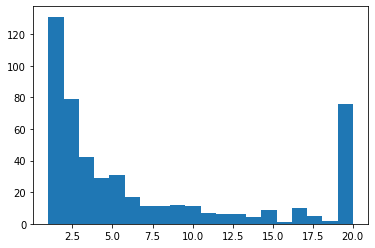

In [57]:
# Histograma com a distribuição dos textos de exemplo
n_text= []
for n in text_examples:
    #print(len(text_examples[n]))
    n_text.append(len(text_examples[n]))
    #break
plt.hist(n_text, bins=20)

### Populate ontology with comments

In [58]:
# Add examples of text in the ontology

for uri in text_examples:
    # URI without "#"
    ind = uri[1:]
    #print(text_examples[i])
    
    try:
        onto[ind].comment = text_examples[uri]
    except:
        print(uri, onto[ind])

#gipsita None
#grupo_05 None
#carbonatos None
#dry_hole None
CAMP_CD_CAMPO_0444 None


In [59]:
 onto.save(file = "OntoGeoLogicaPovoadaInstanciasRelacoesComment.owl", )